In [1]:
 from __future__ import print_function
import torch as t
import torchvision as tv
import torchvision.transforms as transforms
from torchvision.transforms import ToPILImage
import torch.optim as optim
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable
import numpy as np
show = ToPILImage() # 可以把Tensor转成Image，方便可视化
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# 第一次运行程序torchvision会自动下载CIFAR-10数据集，
# 大约100M，需花费一定的时间，
# 如果已经下载有CIFAR-10，可通过root参数指定

# 定义对数据的预处理
transform = transforms.Compose([
        transforms.ToTensor(), # 转为Tensor
        transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)), # 归一化
                             ])

# 训练集
trainset = tv.datasets.CIFAR10(
                    root='/home/lrl/pytorchlearning/cy/tmp/data/', 
                    train=True, 
                    download=True,
                    transform=transform)

trainloader = t.utils.data.DataLoader(
                    trainset, 
                    batch_size=4,
                    shuffle=True, 
                    num_workers=2)

# 测试集
testset = tv.datasets.CIFAR10(
                    '/home/lrl/pytorchlearning/cy/tmp/data/',
                    train=False, 
                    download=True, 
                    transform=transform)

testloader = t.utils.data.DataLoader(
                    testset,
                    batch_size=4, 
                    shuffle=False,
                    num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


ship


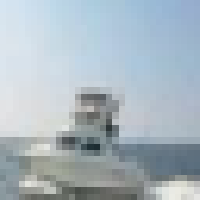

In [3]:
(data,label) = trainset[100]
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))

print(classes[label]) 
show((data+1)/2).resize((200,200))
#注意，之前归一化是归一化到（-1，1），我们+1就化为（0，2），再/2就到（0，1），之后ToPILImage()就转化为（0，255）了

dog frog car frog


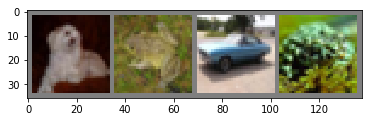

Process Process-1:
Traceback (most recent call last):
  File "/home/lrl/anaconda3/envs/pytorchpy36/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
Process Process-2:
  File "/home/lrl/anaconda3/envs/pytorchpy36/lib/python3.6/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/home/lrl/anaconda3/envs/pytorchpy36/lib/python3.6/site-packages/torch/utils/data/dataloader.py", line 50, in _worker_loop
    r = index_queue.get()
Traceback (most recent call last):
  File "/home/lrl/anaconda3/envs/pytorchpy36/lib/python3.6/multiprocessing/queues.py", line 335, in get
    res = self._reader.recv_bytes()
  File "/home/lrl/anaconda3/envs/pytorchpy36/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
  File "/home/lrl/anaconda3/envs/pytorchpy36/lib/python3.6/multiprocessing/connection.py", line 216, in recv_bytes
    buf = self._recv_bytes(maxlength)
  File "/home/lrl/anaconda3/envs/pytor

In [4]:
dataloader = iter(trainloader)
images,labels=dataloader.next()
print(' '.join('%s' % classes[labels[j]] for j in range(4)))
imshow(tv.utils.make_grid(images))
#show(tv.utils.make_grid((images+1)/2)).resize((400,100))
#这里' '是指把每个label用一个字符隔开，join是指join(后面的这段字符之后)空一个’‘，
#假如输入时列表的话就每个元素之间空一个’‘并将列表中元素连成一个字符串，
#http://www.runoob.com/python/att-string-join.html

In [11]:
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        super(Net,self).__init__()
        
        self.conv1 = nn.Conv2d(3,6,5)
        self.conv2 = nn.Conv2d(6,16,5)
        self.conv3 = nn.Conv2d(16,120,5)
        self.fc2 = nn.Linear(120,84)
        self.fc3 = nn.Linear(84,10)
        
    def forward(self,x):
        x = F.max_pool2d(F.relu(self.conv1(x)),2)
        x = F.max_pool2d(F.relu(self.conv2(x)),2)
        x = F.relu(self.conv3(x))
        x = x.view(x.size()[0], -1) 
        x = F.relu(self.fc2(x)) 
        x = self.fc3(x)
        return x
     
        
    

net=Net()


In [6]:
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5) 
        self.conv2 = nn.Conv2d(6, 16, 5)  
        self.fc1   = nn.Linear(16*5*5, 120)  
        self.fc2   = nn.Linear(120, 84)
        self.fc3   = nn.Linear(84, 10)

    def forward(self, x): 
        x = F.max_pool2d(F.relu(self.conv1(x)), (2, 2)) 
        x = F.max_pool2d(F.relu(self.conv2(x)), 2) 
        x = x.view(x.size()[0], -1) 
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)        
        return x


net = Net()
print(net)

Net(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)


In [7]:
params = list(net.parameters())
print(len(params))
for name,parameters in net.named_parameters():
    print(name,':',parameters.size())

10
conv1.weight : torch.Size([6, 3, 5, 5])
conv1.bias : torch.Size([6])
conv2.weight : torch.Size([16, 6, 5, 5])
conv2.bias : torch.Size([16])
fc1.weight : torch.Size([120, 400])
fc1.bias : torch.Size([120])
fc2.weight : torch.Size([84, 120])
fc2.bias : torch.Size([84])
fc3.weight : torch.Size([10, 84])
fc3.bias : torch.Size([10])


In [8]:
optimizer = optim.SGD(net.parameters(), lr = 0.001, momentum=0.9)
#optimizer = optim.Adam(net.parameters(), lr = 0.001)
criterion = nn.CrossEntropyLoss()
#http://pytorch.org/docs/master/nn.html有关loss函数


In [9]:
t.set_num_threads(8)
for epoch in range(2):
    running_loss=0.0
    for i,data in enumerate(trainloader, 0):
        inputs,labels = data
        #net.cuda()
        inputs, labels = Variable(inputs), Variable(labels)
        #images, labels = images.cuda(), labels.cuda()
        optimizer.zero_grad()
        outputs = net(inputs)
        #一个类实际上只是一个模板，并不是真正的对象，我们需要通过创建该类的实例的方法来建立一个真正的对象
        
        
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()       
        
        running_loss += loss.data[0]
        if i % 2000 == 1999:
            print('[%d,%d] loss=%.3f'%(epoch+1,i+1,running_loss/2000))
            runnng_loss=0.0

            

[1,2000] loss=2.205
[1,4000] loss=4.074
[1,6000] loss=5.759
[1,8000] loss=7.346
[1,10000] loss=8.860


Process Process-3:
Process Process-4:
Traceback (most recent call last):
Traceback (most recent call last):
  File "/home/lrl/anaconda3/envs/pytorchpy36/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
  File "/home/lrl/anaconda3/envs/pytorchpy36/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
  File "/home/lrl/anaconda3/envs/pytorchpy36/lib/python3.6/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/home/lrl/anaconda3/envs/pytorchpy36/lib/python3.6/site-packages/torch/utils/data/dataloader.py", line 50, in _worker_loop
    r = index_queue.get()
  File "/home/lrl/anaconda3/envs/pytorchpy36/lib/python3.6/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/home/lrl/anaconda3/envs/pytorchpy36/lib/python3.6/multiprocessing/queues.py", line 334, in get
    with self._rlock:
Exception ignored in: <bound method DataLoaderIter.__de

KeyboardInterrupt: 

  File "/home/lrl/anaconda3/envs/pytorchpy36/lib/python3.6/site-packages/torch/utils/data/dataloader.py", line 50, in _worker_loop
    r = index_queue.get()
  File "/home/lrl/anaconda3/envs/pytorchpy36/lib/python3.6/multiprocessing/synchronize.py", line 96, in __enter__
    return self._semlock.__enter__()
  File "/home/lrl/anaconda3/envs/pytorchpy36/lib/python3.6/multiprocessing/queues.py", line 335, in get
    res = self._reader.recv_bytes()
KeyboardInterrupt
  File "/home/lrl/anaconda3/envs/pytorchpy36/lib/python3.6/multiprocessing/connection.py", line 216, in recv_bytes
    buf = self._recv_bytes(maxlength)
  File "/home/lrl/anaconda3/envs/pytorchpy36/lib/python3.6/multiprocessing/connection.py", line 407, in _recv_bytes
    buf = self._recv(4)
  File "/home/lrl/anaconda3/envs/pytorchpy36/lib/python3.6/multiprocessing/connection.py", line 379, in _recv
    chunk = read(handle, remaining)
KeyboardInterrupt


In [10]:
t.set_num_threads(8)
for epoch in range(2):  
    
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        
        # 输入数据
        inputs, labels = data
        inputs, labels = Variable(inputs), Variable(labels)
        
        # 梯度清零
        optimizer.zero_grad()
        
        # forward + backward 
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()   
        
        # 更新参数 
        optimizer.step()
        
        # 打印log信息
        running_loss += loss.data[0]
        if i % 2000 == 1999: # 每2000个batch打印一下训练状态
            print('[%d, %5d] loss: %.3f' \
                  % (epoch+1, i+1, running_loss / 2000))
            running_loss = 0.0
print('Finished Training')

[1,  2000] loss: 1.438
[1,  4000] loss: 1.398
[1,  6000] loss: 1.401
[1,  8000] loss: 1.359
[1, 10000] loss: 1.328
[1, 12000] loss: 1.293
[2,  2000] loss: 1.220
[2,  4000] loss: 1.255
[2,  6000] loss: 1.244
[2,  8000] loss: 1.214
[2, 10000] loss: 1.215
[2, 12000] loss: 1.210
Finished Training
